<a href="https://colab.research.google.com/github/AnEdgyVeggie/COMP3132_Assignment1/blob/main/Copy_of_COMP_3132_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##### REMEMBER TO CHANGE RUNTIME TYPE TO GPU
# Ethan Sylvester | 101479568
# COMP 3132 Assignment 1
# January 28, 2025

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# Question 10 ==============================================================
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

fashion_class_dict = {
  0:	"T-shirt/top",
  1:	"Trouser",
  2:	"Pullover",
  3:	"Dress",
  4:	"Coat",
  5:	"Sandal",
  6:	"Shirt",
  7:	"Sneaker",
  8:	"Bag",
  9:	"Ankle boot"
  }

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Question 1 ==============================================================
# Sample Dimensions
print(f"Training Images Dimensions: {train_imgs.ndim}")
print(f"Training Labels Dimensions: {train_labels.ndim}")
print(f"Testing Images Dimensions:  {test_imgs.ndim}")
print(f"Testing Labels Dimensions:  {test_labels.ndim}")

Training Images Dimensions: 3
Training Labels Dimensions: 1
Testing Images Dimensions:  3
Testing Labels Dimensions:  1


In [4]:
# Question 2 ==============================================================
# Train / Test Label Length
print(f"Training Labels Length: {len(train_labels)}")
print(f"Testing Labels Length:  {len(test_labels)}")

Training Labels Length: 60000
Testing Labels Length:  10000


In [5]:
# Question 3 ==============================================================
# Train / Test Labels
for i in range(5):
    print(f"Training Label {i}: {train_labels[i]}")
for i in range(5):
    print(f"Testing Label {i}: {test_labels[i]}")

Training Label 0: 9
Training Label 1: 0
Training Label 2: 0
Training Label 3: 3
Training Label 4: 0
Testing Label 0: 9
Testing Label 1: 2
Testing Label 2: 1
Testing Label 3: 1
Testing Label 4: 6


In [6]:
# Question 4 ==============================================================
# Digital Content of Image index 5 in Training Dataset
print(f"Training Image 5: {train_imgs[6]}")

Training Image 5: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 

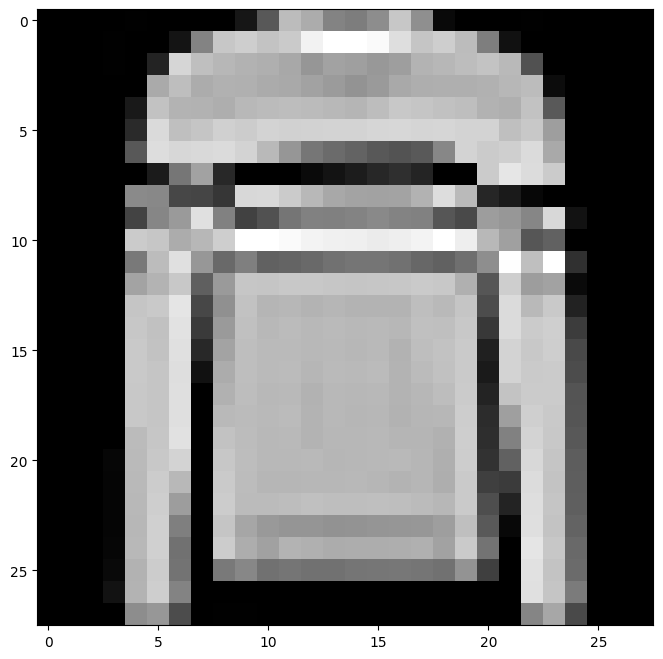

In [7]:
# Question 5 ==============================================================
# This R2D2 looking image is the pixelated contents of image index 5 in the training
plt.figure(figsize=(8,8))
plt.imshow(train_imgs[5], cmap='gray')
plt.show()

In [8]:
# Question 6 ==============================================================
# Image index 5's label:
print(train_labels[5])

2


In [9]:
# Image index 5's classification
print(fashion_class_dict[train_labels[5]])

Pullover


In [10]:
# Question 7 ==============================================================
# Image idex 500 of testing data: digital content
print(test_imgs[500])

[[  0   0   0   0   0   0   0   0   0   0 108  93  38   0   0   0   8  76
  140  34   0   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   0  30  92  69 192 183 149 214 177 194 227 154
  206 143  79  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0  59 127 116  85  63 184 128 104   0  10 126 138
  145  59 104 118  86   0   0   0   0   0]
 [  0   0   0   0   0   3  99  92  81  81  54  67 222 255 209 206 178 184
   72  69  97  97 118  24   0   2   0   0]
 [  0   0   1   1   0  60 121 138  83  64  76  68  23  35  55  52  46  36
   65  72  72  76 102 110   0   0   0   0]
 [  0   0   0   0   0 112  89  52  89  72  67  69  81  73  60  71  64  55
   52  73  77  88 104 108  10   0   1   0]
 [  0   0   0   0  21 110 143 131  55 181 128  54  36 158 185  44  74 150
  154  71  96  88 105 131  50   0   0   0]
 [  0   0   2   0  52 139  90  99  77 187 134 238  68 203 127  31 158 165
  191  73  95  83  86  91  85   0   0   0]
 [  0   0   0   0  97 104 119 135  95 137 156 209 158 185  67  9

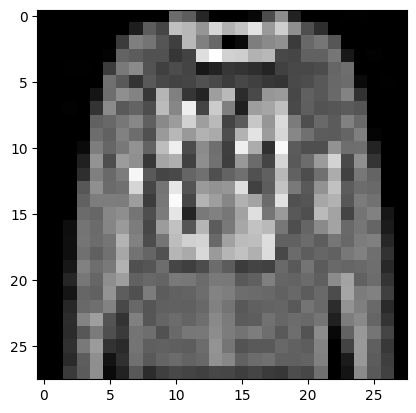

In [11]:
# Question 8 ==============================================================
# Image index 500 of testing dataset: image
plt.figure()
plt.imshow(test_imgs[500], cmap='gray')
plt.show()

In [12]:
# Question 9 ==============================================================
# Label for image index 500 of testing dataset
print(test_labels[500])

2


In [13]:
# Classification of image index 500 in testing dataset
print(fashion_class_dict[test_labels[500]])

Pullover


In [14]:
# Question 10 is in the import statements at the top

# Question 11 ==============================================================
# Define the model
my_network = tf.keras.Sequential([

    # We use the ReLU function for activation in the first layers because it is
    # efficient and performant

    # Question 14 ==============================================================
    layers.Dense(512, activation='relu'),

    # Question 15 ==============================================================
    layers.Dense(128, activation='relu'),

    # Question 16 ==============================================================
    # We use softmax here because it will normalize the output to be between
    # 0 and 1, which aligns with the nomalization you see in our next step.
    layers.Dense(10, activation='softmax')
])


In [15]:
# Question 12 ==============================================================
# Flatten the training images
# Assign the dimensions to variables instead of using hard values, more readable
train_imgs_length = len(train_imgs) # 60000 images
train_img_resolution_x = train_imgs.shape[1] # 28 pixels
train_img_resolution_y = train_imgs.shape[2] # 28 pixels

flattened_train_imgs = train_imgs.reshape(
    train_imgs_length,
    train_img_resolution_x * train_img_resolution_y
    )

# Question 13 ==============================================================
# Normalize data to be between 0 and 1
flattened_train_imgs = flattened_train_imgs.astype("float32") / 255.0
print(flattened_train_imgs.shape) # new shape is (60000, 784)

(60000, 784)


In [16]:
# Question 12 ==============================================================
# Flatten the testing images
test_imgs_length = len(test_imgs) # 10000
test_img_resolution_x = test_imgs.shape[1] # 28
test_img_resolution_y = test_imgs.shape[2] # 28

flattened_test_imgs = test_imgs.reshape(
    test_imgs_length,
    test_img_resolution_x * test_img_resolution_y
    )

# Question 13 ==============================================================
# Normalize data to be between 0 and 1
flattened_test_imgs = flattened_test_imgs.astype("float32") / 255.0
print(flattened_test_imgs.shape) # new shape is (10000, 784)

(10000, 784)


In [21]:
# Question 17 ==============================================================

my_network.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


# Question 18 ==============================================================
my_network.fit(flattened_train_imgs, train_labels, epochs=10, batch_size=32)
# Batch Size: 256, Epochs: 10 accuracy: 0.9862 - loss: 0.0366 <-- Highest Acc
# Batch Size: 128, Epochs: 10 accuracy: 0.9564 - loss: 0.1137 <-- Highest Loss
# Batch Size: 64, Epochs: 10  accuracy: 0.9616 - loss: 0.1008 <-- 2nd Highest Acc
# Batch Size: 32, Epochs: 10  accuracy: 0.9606 - loss: 0.1044 <-- 2nd Highest Loss


# Question 17 ==============================================================

# this configuration requires the labels to have one-hot-encoding. I have
# imported the OneHotEncoder() from sklearn.preprocessing to help with this
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
# reshape the data so that it is a 2D array where each label is in its own array
# of size 1
reshaped_train_lables = train_labels.reshape(-1, 1)
one_hot_train_lables = one_hot.fit_transform(reshaped_train_lables).toarray()

# my_network.compile(optimizer="rmsprop",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])

# Question 18 ==============================================================
# my_network.fit(flattened_train_imgs, one_hot_train_lables, epochs=10, batch_size=256)
# Batch Size: 256, Epochs: 10 accuracy: 0.9706 - loss: 0.0793 <-- worse than the other
# Batch Size: 128, Epochs: 10 accuracy: 0.9622 - loss: 0.1074 <-- better than the other
# Batch Size: 64, Epochs: 10  accuracy: 0.9504 - loss: 0.1474 <-- worse than the other
# Batch Size: 32, Epochs: 10 accuracy: 0.9366 - loss: 0.2007 <-- worse than the other

# You can see here that the batch size DOES affect the overall performance,
# HOWEVER, its not as simple as bigger batch === better results, and vice versa

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9308 - loss: 0.1818
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9349 - loss: 0.1717
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9349 - loss: 0.1688
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9365 - loss: 0.1660
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9369 - loss: 0.1624
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9386 - loss: 0.1603
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9420 - loss: 0.1533
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9444 - loss: 0.1475
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9450 - loss: 0.1460
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9451 - loss: 0.1418


In [18]:
# Question 19 ==============================================================
# How do I compare fashion MNIST to the MNIST we have learned in class?

# The difference, obviously, is largely in the dataset. With MNIST, there is
# really not a lot of room for opinion and technicality. Because numbers are
# inherently 2-Dimensional and they each take on a very different form
# (or in the case of 9 and 6, orientation), classifying a number is very binary
# in terms of that number (It either IS a 4, or it ISN'T a 4).
# With the fashion_mnist, although the process in training these models
# is nearly identical, there is a lot more wiggle room, especially with
# classifications like { 0: T-shirt/top and 6: Shirt }

In [19]:
# Question 20 ==============================================================
# What can we infer from the differences in the accuracy?

# We can infer that accuracy is effected by a multitude of variables.
# Epochs, batchsize, compilers all play a role in trying to achieve the best
# possible accuracy.
# When typing this answer, I decided to rerun the fit with the same 10 epochs
# and batch_size of 32, as I did in the final example I provided, and was given
# a new result:
# old: Batch Size: 32, Epochs: 10  accuracy: 0.9606 - loss: 0.1044
# new: Batch Size: 32, Epochs: 10  accuracy: 0.9682 - loss: 0.0841
#
# This implies that random values beyond our knowledge (likely time) also play
# a role in this process.

In [22]:
#   COMMENT OUT THE SECOND CONFIG FOR THE COMPILER BEFORE RUNNING THIS CELL
# Question 21 ==============================================================

test_loss, test_acc = my_network.evaluate(flattened_test_imgs, test_labels)
# This model is on the verge of underfitting. A desired accuracy of .9 - .95
# wasnt achieved, but it was certainly close.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8934 - loss: 0.4261
